

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [143]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

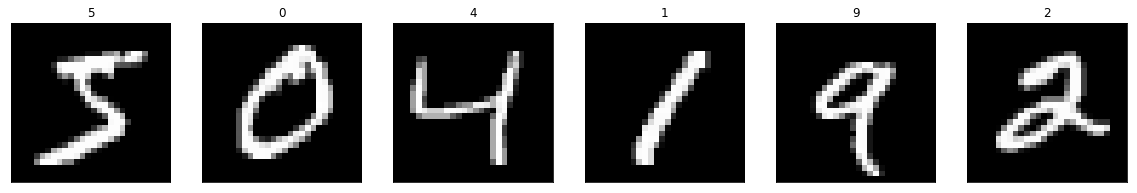

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

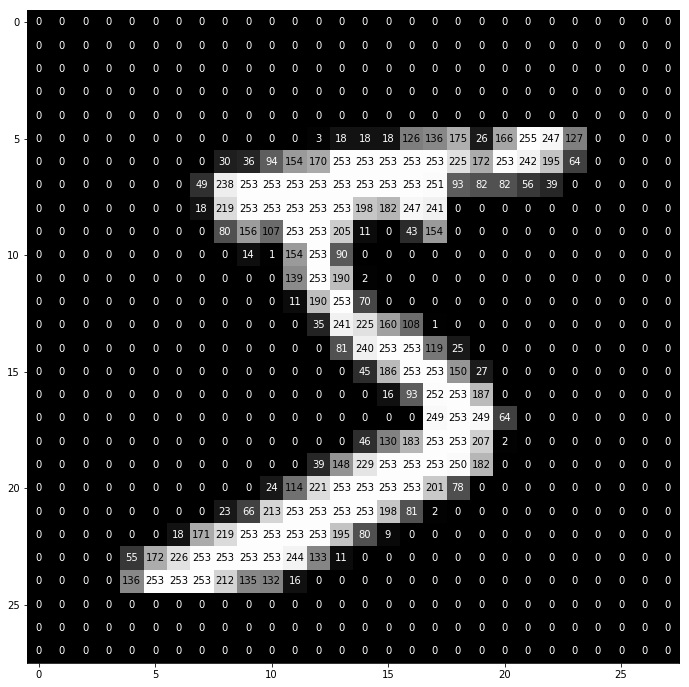

In [145]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [146]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [147]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 6. Define the Model Architecture

In [148]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_55 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_174 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_120 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_175 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_121 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_176 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### 7. Compile the Model

In [149]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [150]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 8.6900%


### 9. Train the Model

In [151]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 116us/step - loss: 0.2831 - acc: 0.9125 - val_loss: 0.1198 - val_acc: 0.9635

Epoch 00001: val_loss improved from inf to 0.11979, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 4s 85us/step - loss: 0.1194 - acc: 0.9636 - val_loss: 0.1102 - val_acc: 0.9683

Epoch 00002: val_loss improved from 0.11979 to 0.11020, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 4s 81us/step - loss: 0.0861 - acc: 0.9739 - val_loss: 0.0945 - val_acc: 0.9746

Epoch 00003: val_loss improved from 0.11020 to 0.09447, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 4s 83us/step - loss: 0.0683 - acc: 0.9794 - val_loss: 0.1004 - val_acc: 0.9737

Epoch 00004: val_loss did not improve from 0.09447
Epoch 5/10
48000/48000 [==============================] - 5s 98us/st

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [152]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [153]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.6800%


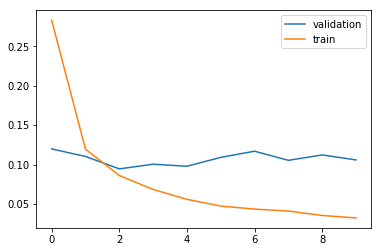

In [154]:
import pandas as pd

def plot_loss(hist):
    df = pd.DataFrame([hist.history['val_loss'], hist.history['loss']])
    bf = df.T
    bf.columns = ['validation', 'train']
    bf.plot()
    
plot_loss(hist)

In [155]:
def build_model(layers, dropouts, X_train, show_summary):
    # define the model
    model = Sequential()
    model.add(Flatten(input_shape=X_train.shape[1:]))
  
    for i, x in enumerate(layers):
        model.add(Dense(x, activation='relu'))
        model.add(Dropout(dropouts[i]))
    
    model.add(Dense(10, activation='softmax'))
    # summarize the model
    if show_summary:
        model.summary()
    
    return model

In [156]:
def train_model(model, name, batch_size, epochs, X_train, y_train, verbose):
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
    checkpointer = ModelCheckpoint(filepath= name + '-mnist.model.best.hdf5', 
                               verbose=verbose, save_best_only=True)
    hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
          validation_split=0.2, callbacks=[checkpointer],
          verbose= verbose, shuffle=True)
    
    return hist

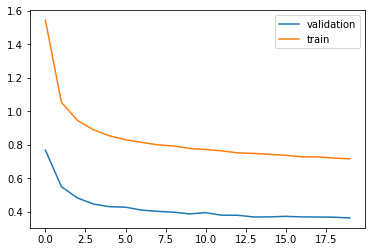

In [158]:
m  = build_model([10, 10], [0.2, 0.2], X_train, False)
hist = train_model(m, 'a', 128, 20, X_train, y_train, 0)
plot_loss(hist)

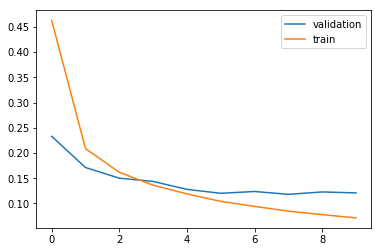

In [159]:
m  = build_model([40, 40], [0, 0], X_train, False)
hist = train_model(m, 'a', 128, 10, X_train, y_train, 0)
plot_loss(hist)

0.10297193053861459


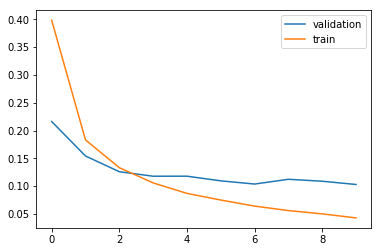

In [160]:
m  = build_model([80, 40], [0, 0], X_train, False)
hist = train_model(m, 'a', 128, 10, X_train, y_train, 0)
plot_loss(hist)
print(hist.history['val_loss'][9])

0.08966066438270112


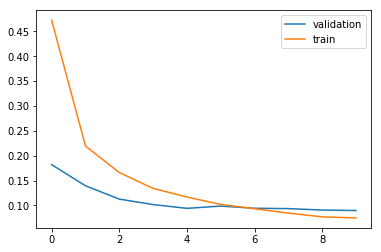

In [161]:
m  = build_model([160, 40], [0.2, 0.2], X_train, False)
hist = train_model(m, 'a', 128, 10, X_train, y_train, 0)
plot_loss(hist)
print(hist.history['val_loss'][9])

0.10831168129046757


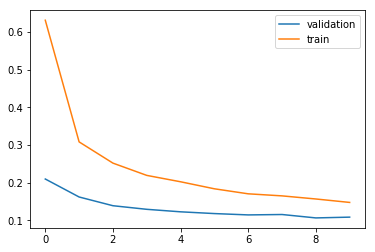

In [162]:
m  = build_model([160, 40], [0.5, 0.2], X_train, False)
hist = train_model(m, 'a', 128, 10, X_train, y_train, 0)
plot_loss(hist)
print(hist.history['val_loss'][9])

0.11362617277602355


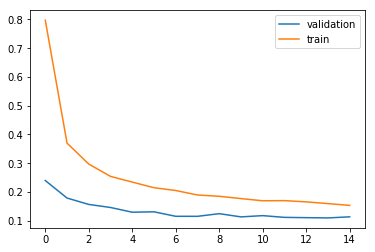

In [163]:
m  = build_model([160, 40, 40], [0.5, 0.2, 0.2], X_train, False)
hist = train_model(m, 'a', 128, 15, X_train, y_train, 0)
plot_loss(hist)
print(hist.history['val_loss'][9])

0.09873886315897107


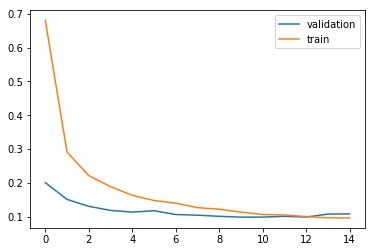

In [164]:
m  = build_model([160, 40, 40], [0.3, 0.2, 0.2], X_train, False)
hist = train_model(m, 'a', 128, 15, X_train, y_train, 0)
plot_loss(hist)
print(hist.history['val_loss'][9])

0.10218021405488252


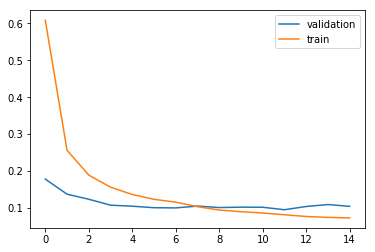

In [165]:
m  = build_model([260, 40, 40], [0.3, 0.2, 0.2], X_train, False)
hist = train_model(m, 'a', 128, 15, X_train, y_train, 0)
plot_loss(hist)
print(hist.history['val_loss'][9])

0.08639960184072455


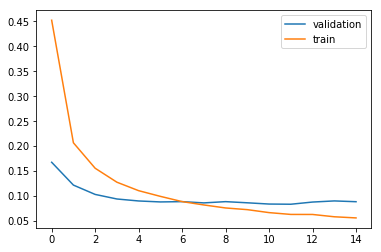

In [166]:
m  = build_model([260, 40], [0.3, 0.2], X_train, False)
hist = train_model(m, 'a', 128, 15, X_train, y_train, 0)
plot_loss(hist)
print(hist.history['val_loss'][9])

0.09855848172632978


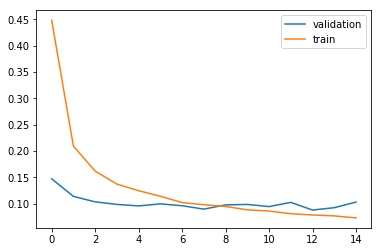

In [167]:
m  = build_model([560, 256, 40], [0.5, 0.3, 0.2], X_train, False)
hist = train_model(m, 'a', 128, 15, X_train, y_train, 0)
plot_loss(hist)
print(hist.history['val_loss'][9])

In [168]:
4000/16

250.0

In [169]:
200 * 200 / 16

2500.0